# Cars 4 You

### Import the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

# filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

### Import the dataset

In [2]:
train_data = pd.read_csv('data/train.csv', sep = ",")
test_data = pd.read_csv('data/test.csv', sep = ",")

## Metadata

`carID` : An attribute that contains an identifier for each car <br>
`Brand` : The car's main brand (e.g. Ford, Toyota) <br>
`model` : The car model <br>
`year`: The year of Registration of the Car <br>
`mileage` : The total reported distance travelled by the car (in miles) <br>
`tax` : The amount of road tax (in £) that, in 2020, was applicable to the car in question <br>
`fuelType`: Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric) <br>
`mpg`: Average Miles per Gallon <br>
`engineSize`: Size of Engine in liters (Cubic Decimeters) <br>
`paintQuality%`: The mechanic's assessment of the cars' overall paint quality and hull integrity (filled by the mechanic during evaluation) <br>
`previousOwners`: Number of previous registered owners of the vehicle. <br>
`hasDamage`: Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not <br>
`price`: The car's price when purchased by Cars 4 You (in £) <br>

### Explore the data

In [3]:
train_data.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [4]:
train_data.tail()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
75968,37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
75969,6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
75970,54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
75971,860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
75972,15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [5]:
# Define the variable carID as the new index
train_data.set_index('carID', inplace = True)

In [6]:
# Check the number of columns and rows of the data
train_data.shape

(75973, 13)

In [7]:
# Check the name of each column of the data
train_data.columns

Index(['Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage'],
      dtype='object')

In [10]:
# Check the data types of each column
train_data.dtypes

Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

- Variable such as year and previousOwners should be int instead of float.
- The variable hasDamage should be a boolean instead of float.

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


- The only column having no nulls seems to be price. Every other variable needs checking.

In [9]:
# Calculate the basic descriptive statistics of the data
train_data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8
engineSize,74457.0,NaN,NaN,NaN,1.660136,0.573462,-0.103493,1.2,1.6,2.0,6.6


- All of our metric variables present significant disparities between maximum value and mean, such as:
    - price - max value of circa 160K VS mean of 16K
    - mileage - max value of 323K VS mean of 23K
    - tax - max value of 580 VS mean of 120
    - mpg - max value of 470 VS mean of 55
    - engineSize - max value of 6 VS mean of 1.7
    - paintQuality% - max value of 125 VS mean of 64
    - previousOwners - max value of 6 VS 1.9

We need to look out for potential outliers: perhaps top of the range cars.

In [10]:
# Get the unique values for each column of the data
cols = train_data.columns
for name in cols:
    print(f"{name}: \n{train_data[name].unique()}")

Brand: 
['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
model: 
[' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 ' i20' ' Rapid' ' a1' ' Auris

Most of our variables are having inconsistent data:
- Brand for example is having multiple values for the same brand, such as BMW (BMW, BM, MW): we need to clean this variable. To do so we can use the following reference: https://motorway.co.uk/sell-my-car/guides/how-many-different-car-brands-are-there
- Model, similarly to brand is having too many unique values. We might need to group these values and classify them. Reference: https://www.motortrend.com/features/car-types-models-body-styles
- The same applies for Transmission and Fuel Type


In [11]:
# Check for any duplicated observations
train_data.duplicated().sum()

np.int64(4)

In [19]:
# Remove duplicated observations
train_data.drop_duplicates()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.300000,2.0,78.0,0.000000,0.0
6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.900000,2.0,38.0,2.000000,0.0
54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.000000,1.0,57.0,3.000000,0.0


In [12]:
# Check the data types of the variables
train_data.dtypes

Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

In [13]:
# Check for any missing values
train_data.isna().sum()

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

We have a lot of missing values, so let's take care of them. But, first, let's divide the columns into metric and non-metric features.

In [14]:
non_metric_features = ["Brand", "model", "transmission", "fuelType"]
metric_features = train_data.columns.drop(non_metric_features).to_list()

In [15]:
# Calculate the mean for each metric feature
means = train_data[metric_features].mean()
means

year               2017.096611
price             16881.889553
mileage           23004.184088
tax                 120.329078
mpg                  55.152666
engineSize            1.660136
paintQuality%        64.590667
previousOwners        1.994580
hasDamage             0.000000
dtype: float64

In [16]:
# Calculate the median for each metric feature
medians = train_data[metric_features].median()
medians

year               2017.0
price             14699.0
mileage           17300.0
tax                 145.0
mpg                  54.3
engineSize            1.6
paintQuality%        65.0
previousOwners        2.0
hasDamage             0.0
dtype: float64

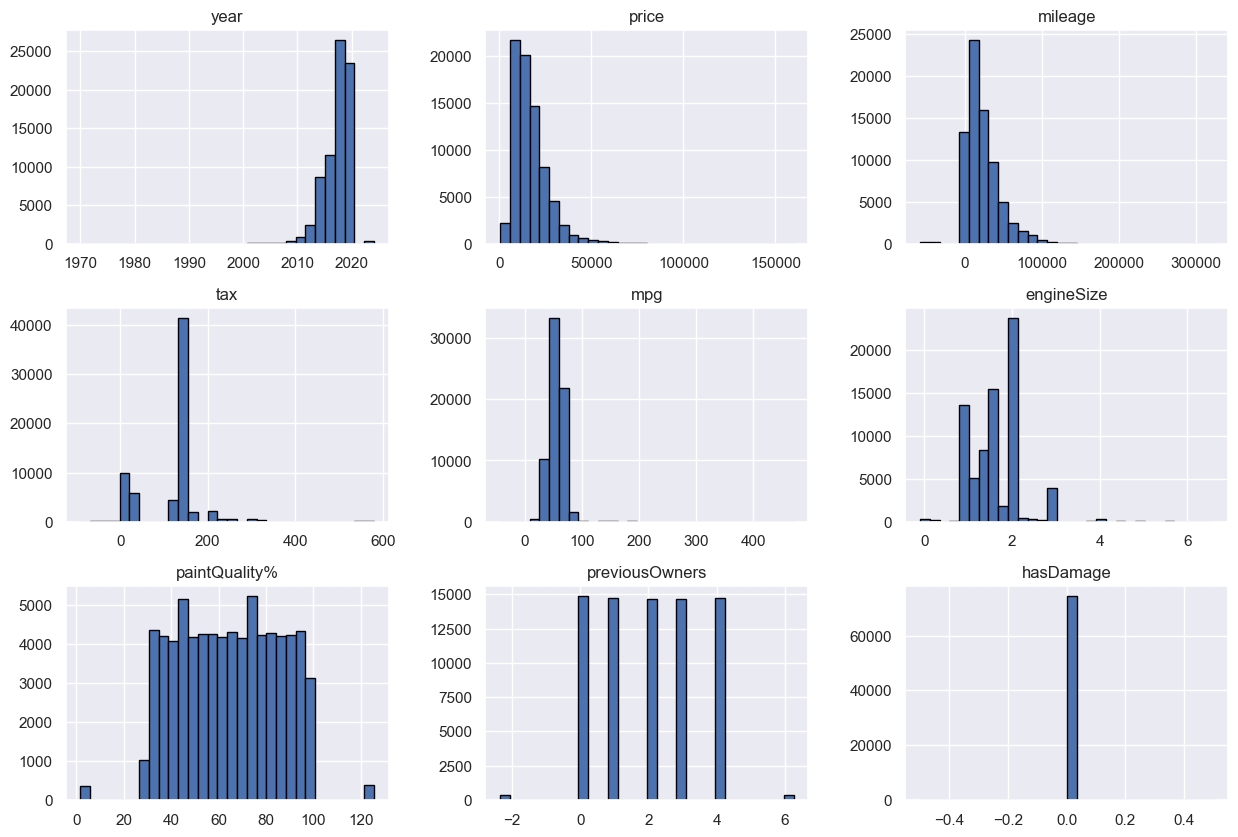

In [20]:
# Do an histogram for each metric feature to choose which method we will use to fill the missing values with
train_data[metric_features].hist(
    figsize = (15, 10),
    bins = 30,
    edgecolor = 'black',
)
plt.show()